In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import matplotlib.font_manager
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.metrics.pairwise import linear_kernel
%matplotlib inline
sns.set(style="whitegrid")

# Data exploration 

In [2]:
data = pd.read_csv("netflix_titles.csv")
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


Transform the `date_added` column from object type to datetime type for ease of use

In [4]:
data["date_added"] = pd.to_datetime(data["date_added"])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      5398 non-null   object        
 4   cast          7069 non-null   object        
 5   country       7280 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7780 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [5]:
data.shape

(7787, 12)

Find missing data in the dataset

In [6]:
data.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

# Cleaning data

Remove unnecessary data for this analysis such as `show id`, `director`, `cast`

In [7]:
data = data.drop(labels=["show_id","director","cast"], axis=1)
data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


Impute the missing data in the countries with `United States` because `United States` is the most repeated value. And delete the `rating` and `date_added` rows since only `7` and `10` records were missing respectively.

In [8]:
data["country"]=data["country"].fillna("United States")
data = data.dropna(subset=["rating","date_added"])
data.isna().sum()

type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
data["listed_in"] = data["listed_in"].apply(lambda x: x.split(",")[0])
data["country"] = data["country"].apply(lambda x: x.split(",")[0])
data.head()

,type,title,country,date_added,release_year,rating,duration,listed_in,description
0,TV Show,3%,Brazil,2020-08-14,2020,TV-MA,4 Seasons,International TV Shows,In a future where the elite inhabit an island ...
1,Movie,7:19,Mexico,2016-12-23,2016,TV-MA,93 min,Dramas,After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Singapore,2018-12-20,2011,R,78 min,Horror Movies,"When an army recruit is found dead, his fellow..."
3,Movie,9,United States,2017-11-16,2009,PG-13,80 min,Action & Adventure,"In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


#  Data analysis

In [10]:
total_catalog = data[["type"]]
total_catalog  = total_catalog .value_counts().reset_index(name="count")
total_catalog 

,type,count
0,Movie,5372
1,TV Show,2398


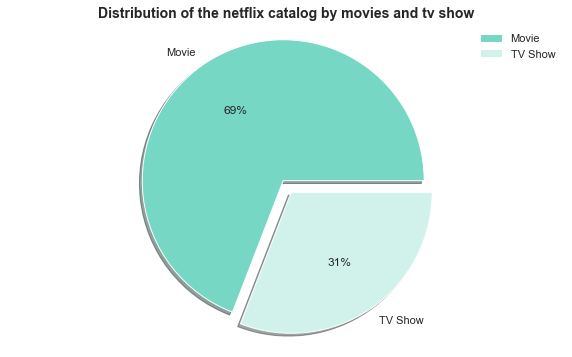

In [11]:
color_palette_list = ["#76D7C4", "#D1F2EB"]

fig, ax = plt.subplots(figsize = (10,6))
labels = total_catalog.type.unique()
ax.pie(total_catalog["count"],explode=(0.1,0),labels=labels,colors=color_palette_list[:], autopct="%1.0f%%", 
       shadow=True, startangle=0)
ax.axis("equal")
ax.set_title("Distribution of the netflix catalog by movies and tv show", fontweight="bold",size=14)
ax.legend(frameon=False)
plt.show()

69% of netflix's total productions correspond to `movies` while the remaining 31% represent `tv show`.

In [12]:
total_productions_per_year = data[['release_year']]
total_productions_per_year = total_productions_per_year[total_productions_per_year['release_year'] >= 2010].value_counts().reset_index(name='counts')

In [13]:
def vertical_show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            height = p.get_height() 
            width = p.get_width() 
            _x = p.get_x() + width / 2
            _y = p.get_y() + height
            ax.text(_x, _y, int(height), ha="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
def horizontal_show_values_on_bars(axs):
    def _show_on_single_plot(ax):
        for p in ax.patches:
            height = p.get_height() 
            width = p.get_width() 
            _x = width+3
            _y =  p.get_y()+(height/2)
            ax.text(_x, _y, int(width), va="center") 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)


In [14]:
total_content_peer_year = data
total_content_peer_year = total_content_peer_year[['release_year']]
total_content_peer_year = total_content_peer_year[total_content_peer_year['release_year'] 
>= 2010].value_counts().reset_index(name='counts')

<function matplotlib.pyplot.show(close=None, block=None)>

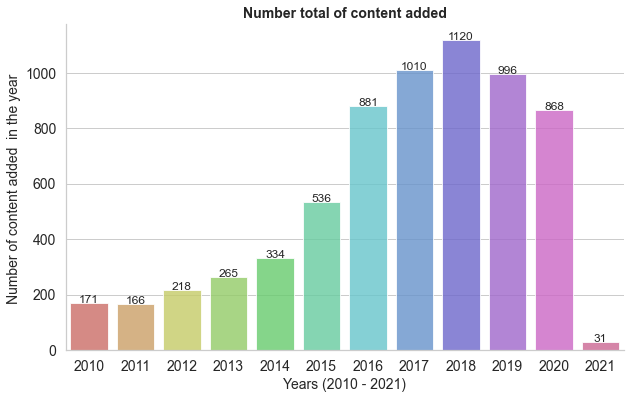

In [15]:
ax = plt.figure(figsize=(10,6))
ax = sns.barplot(data=total_content_peer_year,x='release_year',y = 'counts',alpha=0.8, palette="hls")
sns.despine()
vertical_show_values_on_bars(ax)
plt.title("Number total of content added",fontweight='bold',size=14)
plt.ylabel("Number of content added  in the year ",size=14)
plt.xticks(size=14)
plt.yticks(size=14)
plt.xlabel("Years (2010 - 2021)",size=14)
plt.show

We can see a higher amount of content added to the Netflix catalog in the years `2016 - 2020` with '2018' being its highest peak. 

In [16]:
#Tv shows
tv_shows_peer_year = data[data["type"] == "TV Show"]
tv_shows_peer_year = tv_shows_peer_year[["release_year"]]
tv_shows_peer_year = tv_shows_peer_year[tv_shows_peer_year["release_year"] >= 2010].value_counts().reset_index(name="counts")
#Movies
movies_peer_year = data[data["type"] == "Movie"]
movies_peer_year = movies_peer_year[["release_year"]]
movies_peer_year = movies_peer_year[movies_peer_year["release_year"] >= 2010].value_counts().reset_index(name="counts")

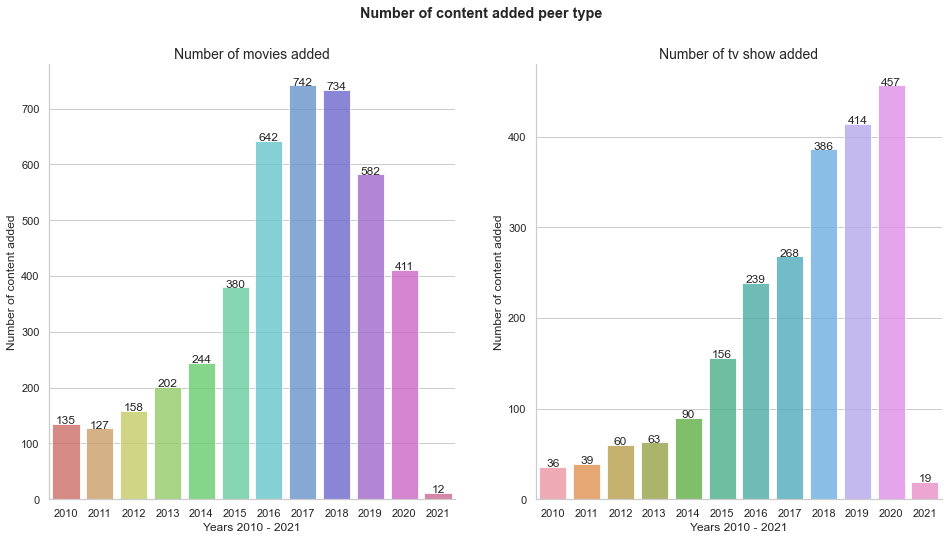

In [17]:
fig, axes = plt.subplots(1,2 , figsize=(16, 8))
fig.suptitle('Number of content added peer type',fontweight='bold')
axes[0].set_title("Number of movies added",fontsize=14)
axes[1].set_title("Number of tv show added",fontsize=14)
sns.barplot(ax=axes[0] ,x='release_year',y = 'counts',data=movies_peer_year,alpha=0.8, palette="hls")
sns.barplot(ax=axes[1] ,x='release_year',y = 'counts',data=tv_shows_peer_year,alpha=0.8)
sns.despine()
plt.setp(axes[:], ylabel='Number of content added')
plt.setp(axes[:], xlabel='Years 2010 - 2021')
vertical_show_values_on_bars(axes[:])
plt.show()

The number of content added in the period `2016 to 2018` increased but decreased in the period `2019 to 2021`, on the contrary, tv shows had a growth that has been increasing since `2016`, maintaining that trend, it can be concluded that there is a trend of Netflix users towards tv shows.

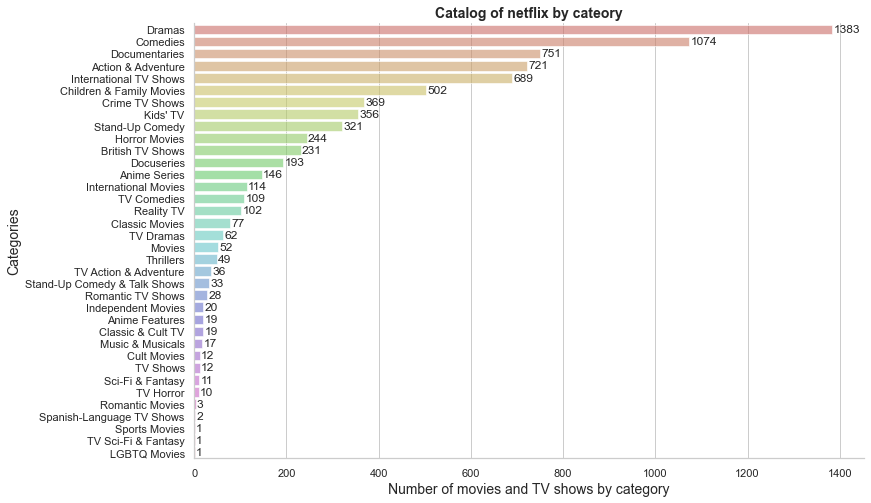

In [18]:
category = data[["listed_in"]].value_counts().reset_index(name="count")
plt.figure(figsize=(12, 8))
plt.title("Catalog of netflix by cateory",size=14, fontweight='bold')
ax = sns.barplot(data=category,x = "count", y = "listed_in", alpha=0.6, palette="hls")
horizontal_show_values_on_bars(ax)
sns.despine()
plt.xlabel("Number of movies and TV shows by category",size=14)
plt.ylabel("Categories", size=14)
plt.show()

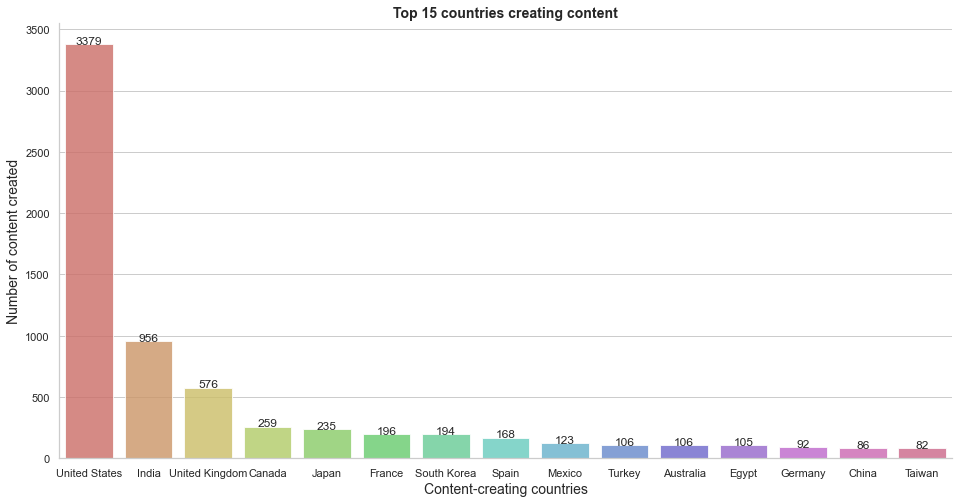

In [19]:
content_by_countries = data[["country"]].value_counts().reset_index(name="count")[:15]
plt.figure(figsize=(16, 8))
plt.title("Top 15 countries creating content",size=14, fontweight='bold')
ax = sns.barplot(data=content_by_countries,x = "country", y = "count", alpha=0.8, palette="hls")
vertical_show_values_on_bars(ax)
sns.despine()
plt.xlabel("Content-creating countries",size=14)
plt.ylabel("Number of content created", size=14)
plt.show()

In [20]:
text = " ".join(review for review in data.description)

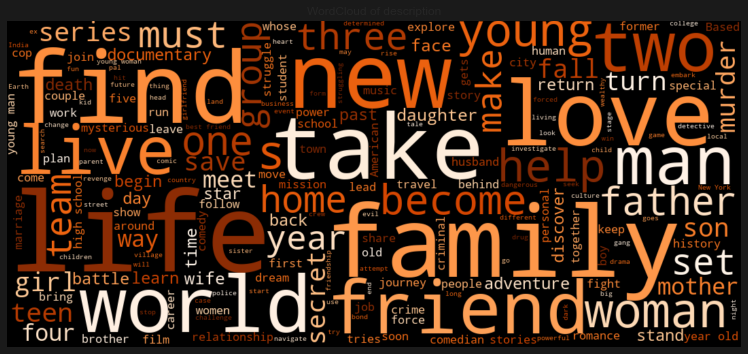

In [21]:
plt.figure(figsize=(20,6), facecolor='k')
wordcloud = WordCloud(width=1080, height=480, colormap="Oranges_r").generate(text)
plt.title("WordCloud of description")
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

# Recommendation system using tf-idf

The tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling.

To do so I made use of the following resources:
* [tf–idf](https://en.wikipedia.org/wiki/Tf%E2%80%93idf)
* [Building a movie content based recommender using tf-idf](https://towardsdatascience.com/content-based-recommender-systems-28a1dbd858f5)
* [Working With Text Data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)
* [Cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity)

In [22]:
tfidfVec = TfidfVectorizer(use_idf=True,stop_words="english")
tfid_matrix = tfidfVec.fit_transform(data["description"])
tfid_matrix.shape

(7770, 17888)

In [23]:
cosine_sim = linear_kernel(tfid_matrix)

Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space. It is defined to equal the cosine of the angle between them, which is also the same as the inner product of the same vectors normalized to both have length 1.
<p align="center">
  <img width="400" height="100" src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1d94e5903f7936d3c131e040ef2c51b473dd071d">
</p>

In [24]:
indices = pd.Series(data.index, index=data['title']).drop_duplicates()
indices.head()

title
3%       0
7:19     1
23:59    2
9        3
21       4
dtype: int64

In [25]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    similar_scores = list(enumerate(cosine_sim[idx]))
    similar_scores = sorted(similar_scores, key=lambda x: x[1], reverse=True)
    similar_scores = similar_scores[1:11]
    movie_index = [i[0] for i in similar_scores]
    return print("The recommendations are: \n",data["title"].iloc[movie_index])

In [26]:
get_recommendations("Altered Carbon")

The recommendations are: 
 2248         Four Christmases
5630             Single Wives
1067                  Boy Bye
574           Are You The One
1224                    Carol
5419                 Say I Do
4609           Omar & Salma 2
5465    Secreto bien guardado
7582        When Love Happens
4161           Moh Maya Money
Name: title, dtype: object


In [27]:
get_recommendations("Marco Polo")

The recommendations are: 
 79                         20 Feet From Stardom
5688                            Social Distance
2229                      For the Love of Spock
376     Alejandro Sanz: What I Was Is What I Am
5229                               ROAD TO ROMA
7679            WWII: Report from the Aleutians
5143                   Reggie Yates Outside Man
2130                               Father Brown
6899                    The Squid and the Whale
5605                                     Silent
Name: title, dtype: object
